## An Autoencoder From Scratch

by Rina Buoy, PhD

1. Network Structure:

The encoder layer compresses the input image (784 dimensions) into a smaller hidden last representation (64 dimensions).
The decoder reconstructs the image from this compressed representation.

2. Training:

The model is trained on the MNIST training set, flattened and normalized to values between 0 and 1.
We use Mean Squared Error as the loss and print it every 10 epochs.

3. Reconstruction Visualization:

The visualize_reconstruction function uses matplotlib to display original and reconstructed images side-by-side for comparison.

4. Running and Observing:

You should see the loss decrease over epochs, and the reconstructed images should look more like the originals as training progresses.

#### Step 1: Set up the imports

In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

### Step 2: Helper Functions

In [2]:

# Define the activation functions
def sigmoid(x):
    x= np.clip( x, -500, 500 )
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### Step 3: Define the Neural Network Structure, Training Loops, Forward, and Backward Pass


In [3]:
# Define autoencoder parameters
input_size = 28 * 28  # 784 for MNIST images
hidden_size = 64      # Size of hidden layer
output_size = input_size

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward pass
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

# Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Backward pass
def backward(X, Z1, A1, Z2, learning_rate=0.001):
    global W1, b1, W2, b2
    m = X.shape[0]

    # Gradients for output layer
    dZ2 = (Z2 - X) / m
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # Gradients for hidden layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

### Step 4: Load and Pepare the dataset

In [4]:
# Load MNIST data using torchvision
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Prepare data
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28) / 255.0  # Normalize and flatten to 784-dimensional vectors
X_test = test_dataset.data.numpy().reshape(-1, 28 * 28) / 255.0

### Step 5: Model Instanciation and Training

In [6]:
# Training the autoencoder
# Training the autoencoder
epochs = 20
learning_rate = 0.001
batch_size = 64

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        Z1, A1, Z2 = forward(X_batch)
        backward(X_batch, Z1, A1, Z2, learning_rate)
    
    # Calculate loss on training data
    _, _, output = forward(X_train)
    loss = mse_loss(X_train, output)
    print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')


Epoch 1, Loss: 0.0503
Epoch 2, Loss: 0.0373
Epoch 3, Loss: 0.0313
Epoch 4, Loss: 0.0274
Epoch 5, Loss: 0.0245
Epoch 6, Loss: 0.0223
Epoch 7, Loss: 0.0206
Epoch 8, Loss: 0.0192
Epoch 9, Loss: 0.0180
Epoch 10, Loss: 0.0170
Epoch 11, Loss: 0.0162
Epoch 12, Loss: 0.0155


KeyboardInterrupt: 

### Step 6: Model Testing by Reconstruction

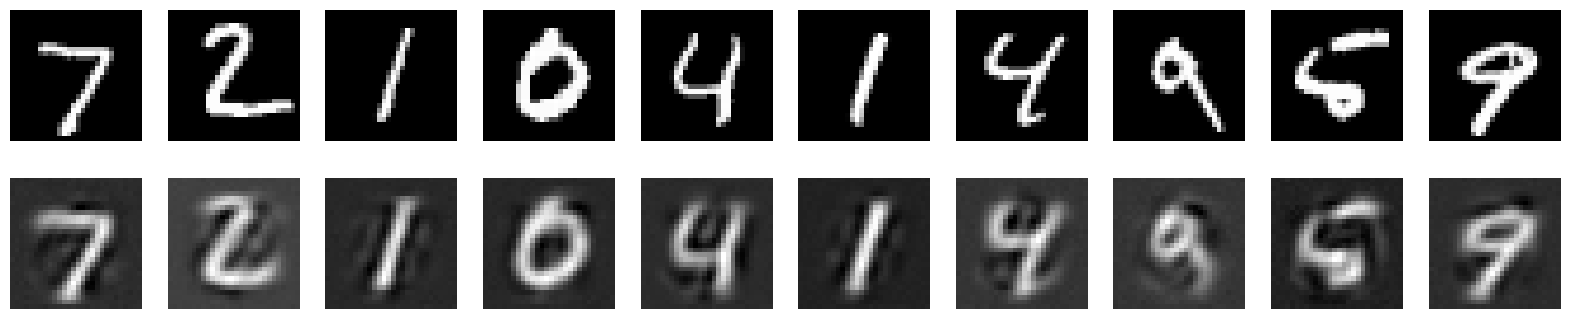

In [7]:
# Testing and visualizing the reconstructed images
def plot_reconstructed_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap="gray")
        plt.axis("off")

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
    plt.show()

# Test on x_test data
_, _, x_test_reconstructed = forward(X_test)
plot_reconstructed_images(X_test, x_test_reconstructed)